dataset = https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

### Visualização dos dados

In [3]:
data = r'C:\Users\cedua\CDIA - PUCSP\PROJETO INTEGRADO\PROJETO FINAL 4º SEMESTRE\StellarClassification\data\star_classification.csv'

df = pd.read_csv(data)
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [4]:
def df_by_class(classe):
    return df[df['class']==classe.upper()]

In [5]:
# estatística básica e distribuição de cada classe

print('GALAXY')
print(f"{len(df_by_class('galaxy'))} dados")
display(df_by_class('galaxy').describe())

print('STAR')
print(f"{len(df_by_class('star'))} dados")
display(df_by_class('star').describe())

print('QUASAR')
print(f"{len(df_by_class('qso'))} dados")
display(df_by_class('qso').describe())

GALAXY
59445 dados


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,5.944500e+04,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.0,59445.000000,59445.000000,5.944500e+04,59445.000000,59445.000000,59445.000000,59445.000000
mean,1.237665e+18,177.954727,23.513911,22.587379,20.906101,19.587552,18.851990,18.449156,4513.815998,301.0,3.484650,191.011052,5.482554e+18,0.421596,4869.375608,55423.463605,450.645858
std,8.399536e+12,94.403760,19.315205,2.264355,2.107755,1.874133,1.689809,1.656302,1955.679720,0.0,1.574524,153.774936,3.218214e+18,0.264858,2858.332435,1806.053472,272.901259
min,1.237646e+18,0.005528,-12.364701,13.897990,12.679020,11.746640,11.299560,10.897380,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,131.506951,5.167016,20.794760,18.912680,17.817150,17.379670,17.095670,3225.000000,301.0,2.000000,83.000000,2.445527e+18,0.164527,2172.000000,53845.000000,221.000000
50%,1.237664e+18,181.315787,22.301731,22.841770,21.582200,20.104590,19.223660,18.766630,4263.000000,301.0,4.000000,150.000000,5.370729e+18,0.456274,4770.000000,55830.000000,433.000000
75%,1.237668e+18,231.333266,37.972697,24.207410,22.445130,20.974610,19.947090,19.472260,5322.000000,301.0,5.000000,248.000000,7.647197e+18,0.594699,6792.000000,56543.000000,649.000000
max,1.237681e+18,359.994125,77.615588,29.325650,31.602240,29.571860,30.163590,29.383740,8162.000000,301.0,6.000000,847.000000,1.412693e+19,1.995524,12547.000000,58932.000000,1000.000000


STAR
21594 dados


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,2.159400e+04,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.0,21594.000000,21594.000000,2.159400e+04,21594.000000,21594.000000,21594.000000,21594.000000
mean,1.237664e+18,174.234485,23.498554,20.689805,19.153188,18.946969,18.543736,17.870400,4303.056821,301.0,3.576271,179.933546,4.827882e+18,-0.000115,4287.920348,55131.149115,410.120033
std,8.300272e+12,99.876175,20.383288,68.228825,68.210460,1.972786,1.841714,68.193708,1932.563605,0.0,1.628102,148.602639,3.030706e+18,0.000465,2691.789973,1656.266867,255.385284
min,1.237646e+18,0.029838,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,3.006288e+17,-0.004136,267.000000,51608.000000,1.000000
25%,1.237658e+18,114.863064,3.127855,19.327275,18.034847,17.454012,17.139703,16.963810,2964.000000,301.0,2.000000,80.000000,2.609860e+18,-0.000295,2318.000000,53905.000000,201.000000
50%,1.237663e+18,174.151671,23.400565,21.010555,19.542825,18.955080,18.592360,18.319225,4002.000000,301.0,4.000000,141.000000,3.711076e+18,-0.000076,3296.000000,54924.000000,394.000000
75%,1.237669e+18,240.850550,39.939705,22.960617,21.228690,20.557477,20.041690,19.729615,5421.000000,301.0,5.000000,225.000000,7.190131e+18,0.000075,6386.000000,56365.000000,582.000000
max,1.237681e+18,359.999810,83.000519,30.660390,30.607000,29.374110,30.250090,26.427790,8162.000000,301.0,6.000000,989.000000,1.412693e+19,0.004153,12547.000000,58932.000000,1000.000000


QUASAR
18961 dados


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.896100e+04,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.0,18961.000000,18961.000000,1.896100e+04,18961.000000,18961.000000,18961.000000,18961.000000
mean,1.237665e+18,180.474314,26.808621,21.547619,20.926193,20.624089,20.431173,20.266732,4582.701598,301.0,3.522494,177.886979,7.817338e+18,1.719676,6943.071621,56627.547176,489.768419
std,8.659960e+12,98.962348,19.588410,1.495879,1.163239,1.084237,1.080135,1.095076,2016.312890,0.0,1.575871,132.801895,3.143628e+18,0.913954,2792.093167,1579.823334,283.673805
min,1.237646e+18,0.010959,-15.980904,10.996230,13.662170,12.357630,12.637440,11.302470,109.000000,301.0,1.000000,11.000000,3.006293e+17,0.000461,267.000000,51608.000000,1.000000
25%,1.237659e+18,129.133119,7.427090,20.637640,20.249730,20.006330,19.811070,19.644250,3225.000000,301.0,2.000000,82.000000,5.635235e+18,1.106605,5005.000000,55868.000000,250.000000
50%,1.237662e+18,183.682504,29.299167,21.503240,21.056290,20.772720,20.582110,20.373970,3926.000000,301.0,3.000000,143.000000,8.527725e+18,1.617232,7574.000000,56955.000000,486.000000
75%,1.237671e+18,235.864774,42.886953,22.286470,21.687770,21.413450,21.202280,21.001230,5935.000000,301.0,5.000000,239.000000,9.847373e+18,2.220279,8746.000000,57870.000000,730.000000
max,1.237681e+18,359.999615,82.288657,32.781390,27.894820,27.397090,32.141470,28.790550,8162.000000,301.0,6.000000,937.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [6]:
#atributo médio de cada feature para cada classe (graficamente)
features_plot = df.groupby('class').mean()

fig = px.bar(features_plot, x=features_plot.index, y=['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'MJD'], barmode='group')
fig.update_layout(
    title = 'ATRIBUTO MÉDIO POR FEATURE'
)
fig.show()

### Pré processamento/Tratamento dos dados

In [7]:
df.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [8]:
#transformando a coluna 'class' em numérica usando onehotenconding

df_str = df['class'].to_frame() #selecionando apenas a coluna numérica

encoder = OrdinalEncoder()

df_str = encoder.fit_transform(df_str)
df_str

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [9]:
#transformando o ordinalencoding em um frame para inseri-lo no dataset

df_str = pd.DataFrame(df_str) #transformando em df

df_all = pd.concat([df, df_str], axis=1) #inserindo no dataset
df_all = df_all.drop(['class', 'rerun_ID', 'obj_ID'], axis=1) #rerun_ID possui 100.000 valores iguais
                                                              #obj_ID é apenas um nº identificação de objeto feita pela CAS
df_all.rename(columns={0:'class'}, inplace=True)
df_all

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,0.634794,5812,56354,171,0.0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,0.779136,10445,58158,427,0.0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,0.644195,4576,55592,299,0.0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,0.932346,9149,58039,775,0.0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,0.116123,6121,56187,842,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,0.000000,9374,57749,438,0.0
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,0.404895,7626,56934,866,0.0
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,0.143366,2764,54535,74,0.0
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,0.455040,6751,56368,470,0.0


galaxy --> 0

star   --> 2

quasar --> 1

In [10]:
df_all.head()

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,0.634794,5812,56354,171,0.0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,0.779136,10445,58158,427,0.0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,0.644195,4576,55592,299,0.0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,0.932346,9149,58039,775,0.0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,0.116123,6121,56187,842,0.0


### Treinamento e teste - DecisionTree

In [11]:
# X --> features 
# y --> target 

X = df_all[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
y = df_all[['class']]

cl_tree = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cl_tree = cl_tree.fit(X_train, y_train)

previsao = cl_tree.predict(X_test)



In [12]:
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     17845
         1.0       0.92      0.91      0.91      5700
         2.0       1.00      1.00      1.00      6455

    accuracy                           0.97     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.97      0.97      0.97     30000



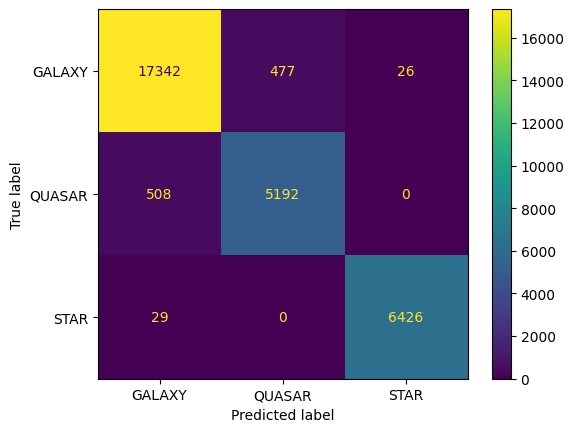

In [17]:
class_names = ['GALAXY', 'QUASAR', 'STAR']


plot_confusion_matrix(cl_tree, X_test, y_test,
                      display_labels = class_names)

### Treinamento e teste - RandomForest

In [14]:
rf_clf = RandomForestClassifier(n_estimators=100)

X_rf = df_all[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
y_rf = df_all[['class']]

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

rf_clf = rf_clf.fit(X_train, y_train)

previsao_rf = rf_clf.predict(X_test)

In [15]:
print(classification_report(y_test, previsao_rf))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     17845
         1.0       0.96      0.92      0.94      5700
         2.0       0.99      1.00      1.00      6455

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000



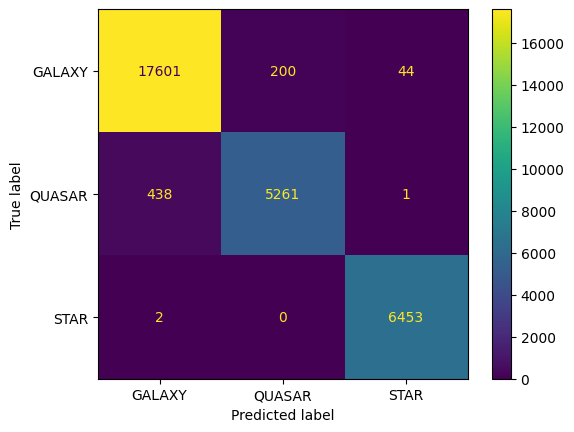

In [16]:
class_names = ['GALAXY', 'QUASAR', 'STAR']

plot_confusion_matrix(rf_clf, X_test, y_test, 
                      display_labels = class_names)